# Baseline Speculator model versus photo
The baseline setup uses data from both spectroscopy and photometry. In this notebook we compare the baseline posteriors to the posteriors from fitting just photometry

In [1]:
import os
import h5py 
import numpy as np 
# --- gqp_mc ---
from gqp_mc import data as Data

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
dir_mocha = '/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/'

In [11]:
def Fmcmc(igal, sim='lgal', data='specphoto', noise='bgs0_legacy', method='ispeculator', model='emulator', user='chang'): 
    ''' File name of MCMC output
    '''
    if user == 'chang': 
        subdir = ''
    elif user == 'james': 
        subdir = 'james/%s_0_96' % data
    else: 
        subdir = user
    fmcmc = os.path.join(dir_mocha, method, subdir, '%s.%s.noise_%s.%s.%i.mcmc.hdf5' % (sim, data, noise, model, igal))
    return fmcmc

In [12]:
ngal = 97 # mini mock challenge

In [13]:
users =  np.array(['chang', 'james', 'mmezcua', 'gosia'])
for i in range(ngal):
    if np.any([not os.path.isfile(Fmcmc(i, data='specphoto', noise='bgs0_legacy', user=user)) for user in users]): 
        print('baseline %i missing: %s' % (i, users[np.array([not os.path.isfile(Fmcmc(i, data='specphoto', noise='bgs0_legacy', user=user)) for user in users])]))
    if np.any([not os.path.isfile(Fmcmc(i, data='photo', noise='legacy', user=user)) for user in users]): 
        print('photo %i missing: %s' % (i, users[np.array([not os.path.isfile(Fmcmc(i, data='photo', noise='legacy', user=user)) for user in users])]))

photo 0 missing: ['mmezcua']
photo 1 missing: ['mmezcua']
baseline 2 missing: ['mmezcua']
photo 2 missing: ['mmezcua' 'gosia']
baseline 3 missing: ['mmezcua']
photo 3 missing: ['mmezcua' 'gosia']
baseline 4 missing: ['mmezcua']
photo 4 missing: ['mmezcua' 'gosia']
baseline 5 missing: ['mmezcua']
photo 5 missing: ['mmezcua' 'gosia']
baseline 6 missing: ['mmezcua']
photo 6 missing: ['mmezcua' 'gosia']
baseline 7 missing: ['mmezcua']
photo 7 missing: ['mmezcua' 'gosia']
baseline 8 missing: ['mmezcua']
photo 8 missing: ['mmezcua' 'gosia']
baseline 9 missing: ['mmezcua']
photo 9 missing: ['mmezcua' 'gosia']
baseline 10 missing: ['mmezcua']
photo 10 missing: ['mmezcua' 'gosia']
baseline 11 missing: ['mmezcua']
photo 11 missing: ['mmezcua' 'gosia']
baseline 12 missing: ['mmezcua']
photo 12 missing: ['mmezcua' 'gosia']
baseline 13 missing: ['mmezcua']
photo 13 missing: ['mmezcua' 'gosia']
baseline 14 missing: ['mmezcua']
photo 14 missing: ['mmezcua' 'gosia']
baseline 15 missing: ['mmezcua']
ph

In [15]:
base_chains = np.tile(-999., (len(users), ngal, 3, 9))
phot_chains =  np.tile(-999., (len(users), ngal, 3, 8))

for i_user, user in enumerate(users):
    for igal in range(ngal): 
        fbase = Fmcmc(igal, data='specphoto', noise='bgs0_legacy', user=user)
        fphot = Fmcmc(igal, data='photo', noise='legacy', user=user)
        if os.path.isfile(fbase): 
            base = h5py.File(fbase, 'r')
            _theta = np.percentile(base['mcmc_chain'][...], [16, 50, 84], axis=0)
            base_chains[i_user, igal, :, :] = _theta
        if os.path.isfile(fphot): 
            phot = h5py.File(fphot, 'r')
            _theta = np.percentile(phot['mcmc_chain'][...], [16, 50, 84], axis=0)
            phot_chains[i_user, igal, :, :] = _theta

## Stellar mass comparison

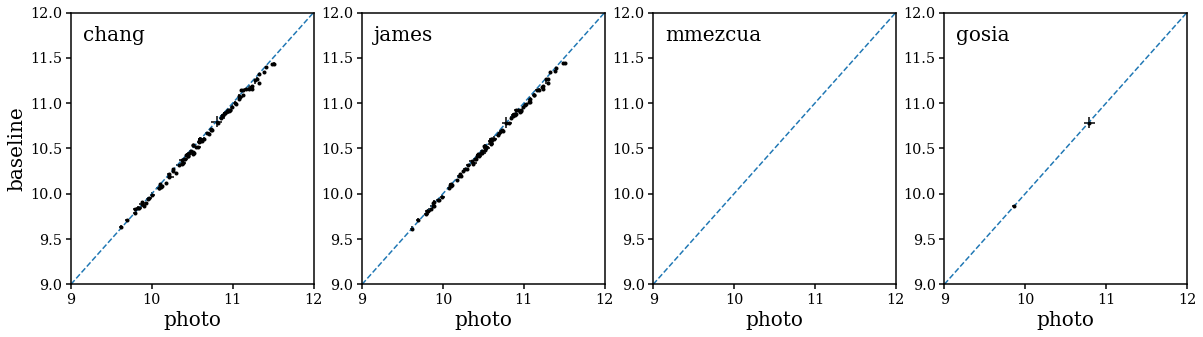

In [19]:
itheta = 0 # theta index

fig = plt.figure(figsize=(5*len(users), 5))
for i_user in range(len(users)): 
    sub = fig.add_subplot(1,len(users),i_user+1)
    sub.errorbar(phot_chains[i_user,:,1,itheta], base_chains[i_user,:,1,itheta], 
                 xerr=[phot_chains[i_user,:,1,itheta] - phot_chains[i_user,:,0,itheta], phot_chains[i_user,:,2,itheta] - phot_chains[i_user,:,1,itheta]], 
                 yerr=[base_chains[i_user,:,1,itheta] - base_chains[i_user,:,0,itheta], base_chains[i_user,:,2,itheta] - base_chains[i_user,:,1,itheta]], fmt='.k')
    sub.plot([9., 12.], [9., 12.], c='C0', ls='--')
    sub.text(0.05, 0.95, users[i_user], ha='left', va='top', transform=sub.transAxes, fontsize=20)
    sub.set_xlabel('photo', fontsize=20)
    sub.set_xlim(9., 12.)
    if i_user == 0: sub.set_ylabel('baseline', fontsize=20)
    sub.set_ylim(9., 12.)

There's pretty good agreement between the baseline and the photometry only posteriors

In [20]:
specs, meta = Data.Spectra(sim='lgal', noise='bgs0', lib='bc03', sample='mini_mocha')

In [21]:
ms_input = meta['logM_total'][:ngal]

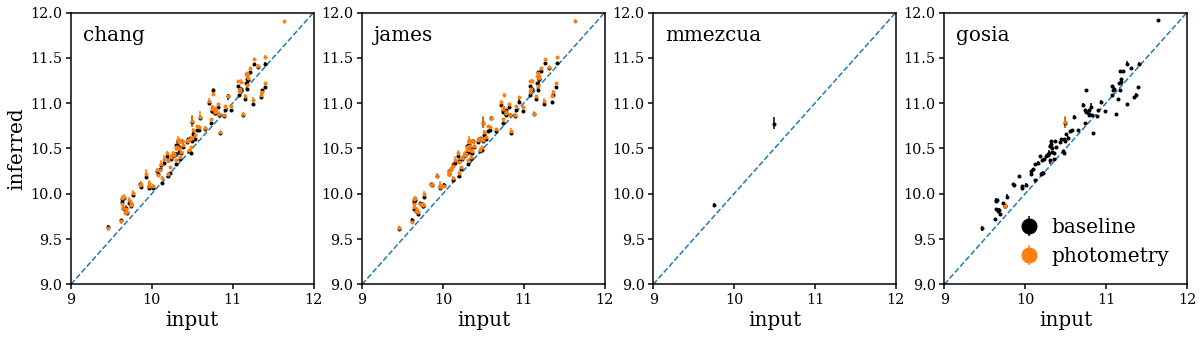

In [23]:
itheta = 0 # theta index

fig = plt.figure(figsize=(5*len(users), 5))
for i_user in range(len(users)): 
    sub = fig.add_subplot(1,len(users),i_user+1)
    _plt_base = sub.errorbar(ms_input, base_chains[i_user,:,1,itheta], 
                 yerr=[base_chains[i_user,:,1,itheta] - base_chains[i_user,:,0,itheta], base_chains[i_user,:,2,itheta] - base_chains[i_user,:,1,itheta]], fmt='.k')
    _plt_phot = sub.errorbar(ms_input, phot_chains[i_user,:,1,itheta],
                 yerr=[phot_chains[i_user,:,1,itheta] - phot_chains[i_user,:,0,itheta], phot_chains[i_user,:,2,itheta] - phot_chains[i_user,:,1,itheta]], fmt='.C1')
    sub.plot([9., 12.], [9., 12.], c='C0', ls='--')
    sub.text(0.05, 0.95, users[i_user], ha='left', va='top', transform=sub.transAxes, fontsize=20)
    sub.set_xlabel('input', fontsize=20)
    sub.set_xlim(9., 12.)
    if i_user == 0: sub.set_ylabel('inferred', fontsize=20)
    sub.set_ylim(9., 12.)
    if i_user == 3: sub.legend([_plt_base, _plt_phot], ['baseline', 'photometry'], loc='lower right', handletextpad=0.1, markerscale=5, fontsize=20)

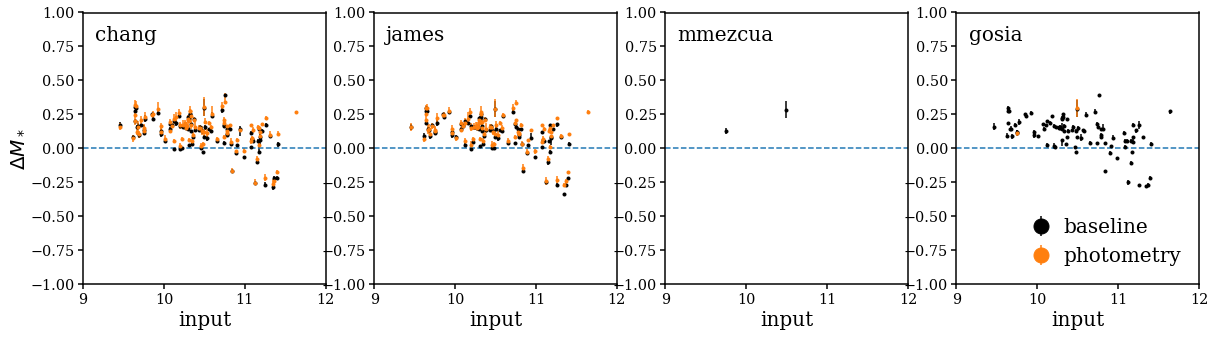

In [25]:
fig = plt.figure(figsize=(5*len(users), 5))
for i_user in range(len(users)): 
    sub = fig.add_subplot(1,len(users),i_user+1)
    _plt_base = sub.errorbar(ms_input, base_chains[i_user,:,1,itheta] - ms_input, 
                 yerr=[base_chains[i_user,:,1,itheta] - base_chains[i_user,:,0,itheta], base_chains[i_user,:,2,itheta] - base_chains[i_user,:,1,itheta]], fmt='.k')
    _plt_phot = sub.errorbar(ms_input, phot_chains[i_user,:,1,itheta] - ms_input,
                 yerr=[phot_chains[i_user,:,1,itheta] - phot_chains[i_user,:,0,itheta], phot_chains[i_user,:,2,itheta] - phot_chains[i_user,:,1,itheta]], fmt='.C1')
    sub.plot([9., 12.], [0., 0.], c='C0', ls='--')
    sub.text(0.05, 0.95, users[i_user], ha='left', va='top', transform=sub.transAxes, fontsize=20)
    sub.set_xlabel('input', fontsize=20)
    sub.set_xlim(9., 12.)
    if i_user == 0: sub.set_ylabel('$\Delta M_*$', fontsize=20)
    sub.set_ylim(-1., 1.)
    if i_user == 3: sub.legend([_plt_base, _plt_phot], ['baseline', 'photometry'], loc='lower right', handletextpad=0.1, markerscale=5, fontsize=20)

It seems that the bias we see with speculator is worse for photometry. But the scatter seems roughly the same.